In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# lOading the data
data = pd.read_csv("cricketers.csv",delimiter = '\t',header = 0,index_col=None)

In [5]:
#Displaying the data
data.head()

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,Abhishek Sharma,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.0,0.0
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.0,0.0


In [7]:
df = pd.DataFrame(data)

In [8]:
# Normalisation of data attributes
df = df.drop(['PLAYER'], axis = 1)
b=(df-df.min())/(df.max()-df.min())
b

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,0.588235,0.529412,0.182313,0.359375,0.193798,0.220889,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.705882,0.647059,0.653061,0.703125,0.532946,0.703284,0.581800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.176471,0.176471,0.085714,0.359375,0.063953,0.830806,0.636333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.882353,0.823529,0.503401,0.507812,0.606589,0.375313,0.394033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.352941,0.352941,0.201361,0.351562,0.228682,0.325201,0.418067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.176471,0.058824,0.078799,0.041667,0.388889,0.636364
105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352941,0.279412,0.382739,0.166667,0.472222,0.650303
106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352941,0.323529,0.429644,0.166667,0.530093,0.630303
107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235294,0.148529,0.213884,0.208333,0.211111,0.618182


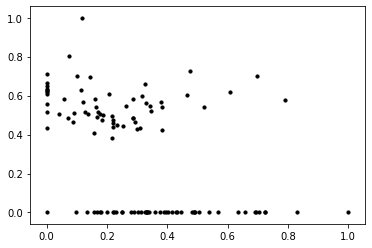

In [14]:
# Getting the values and plotting it
f2 = b['bowling_economy '].values
f1 = b['average_runs'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=10)

In [15]:
# Euclidean Distance Calculation
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [16]:
# Number of clusters
k = 2
# X coordinates of random centroids
C_x = np.random.uniform(0, np.max(X), size=k)
# Y coordinates of random centroids
C_y = np.random.uniform(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[0.16079652 0.0167867 ]
 [0.2877138  0.17574807]]


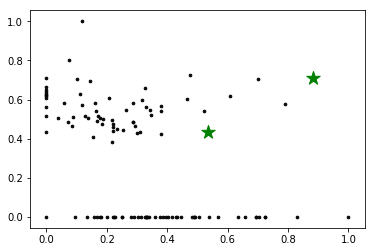

In [28]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [29]:
# To store the value of centroids when it updates
from copy import deepcopy
C_old = np.zeros(C.shape)

# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero
while error != 0:
    
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

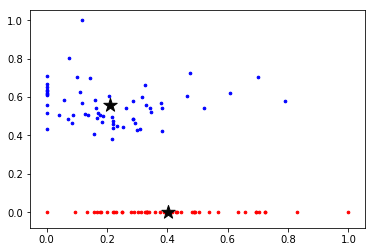

In [30]:
# Plotting for K=2
colors = ['r', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

For other K values

In [14]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.uniform(0, np.max(X), size=k)
# Y coordinates of random centroids
C_y = np.random.uniform(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[0.20880543 0.98820895]
 [0.4649112  0.12381325]
 [0.28154606 0.5279568 ]]


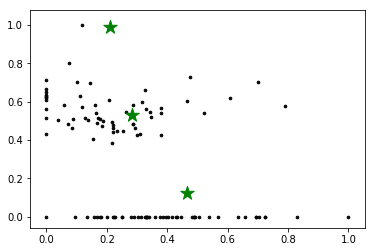

In [15]:
# Plotting with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [16]:
# To store the value of centroids when it updates
from copy import deepcopy
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

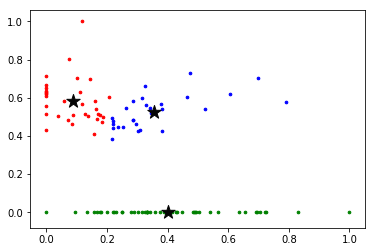

In [17]:
# Plotting with K=3
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [18]:
# Number of clusters
k = 4
# X coordinates of random centroids
C_x = np.random.uniform(0, np.max(X), size=k)
# Y coordinates of random centroids
C_y = np.random.uniform(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[0.09630159 0.60038877]
 [0.33058217 0.8752762 ]
 [0.7478911  0.59917843]
 [0.19095309 0.06594461]]


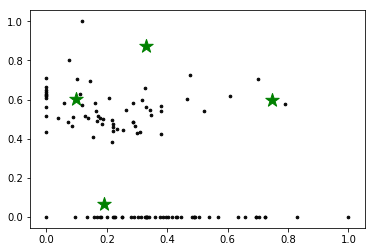

In [19]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [20]:
# To store the value of centroids when it updates
from copy import deepcopy
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

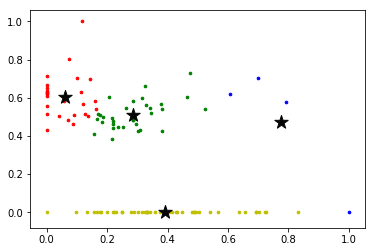

In [21]:
#Plotting with K=4
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [22]:
# Number of clusters
k = 5
# X coordinates of random centroids
C_x = np.random.uniform(0, np.max(X), size=k)
# Y coordinates of random centroids
C_y = np.random.uniform(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[0.5031768  0.5255439 ]
 [0.79908144 0.203837  ]
 [0.9658858  0.7312587 ]
 [0.46601573 0.27879837]
 [0.17663476 0.6747884 ]]


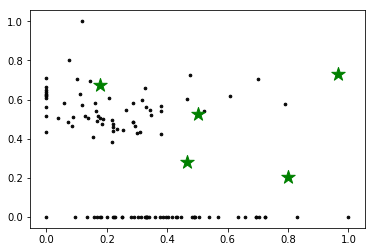

In [23]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [24]:
# To store the value of centroids when it updates
from copy import deepcopy
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

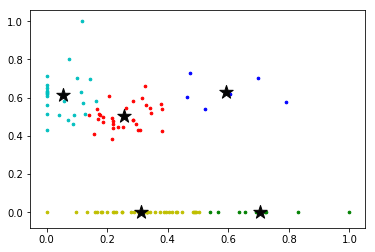

In [25]:
# Plotting for K=5
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')